### 01. Introdução

Vamos subor que tenhamos uma série de informações coletadas sobre um solo, e queremos descobrir qual seria a plantação adequada para se plantar nesse solo com base em informações de outros produtores. Podemos então utilizar um modelo de machine learning para nos dizer qual seria a melhor opção de plantação. 

Este é um problema de classificação multiclasse, com mais de duas saídas possíveis. Vamos criar uma rede neural para tentar predizer qual é a melhor opção de plantação com base em nosso data set coletado na Kagle. A construção da rede neural se dará através do TensorFlow, e poderemos observar como utilizar essa poderosa ferramenta de rede profunda de maneira rápida para solucionar um problema que pode ocorrer na decisão do pequeno agropecuário ao se decidir o que plantar no solo.

dataset: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

### 02. Conhecendo o dataset

In [1]:
import pandas as pd
df = pd.read_csv('Crop_Recommendation.csv')
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


**Temos algumas informações sobre o solo**
* Nitrogênio;
* Fósforo;
* Potássio;
* Temperatura;
* Humidade;
* pH;
* Pluviosidade.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
# Checando valores nulos
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

Temos 2200 registros e nenhum valor nulo no nosso dataset, ótimo!

In [4]:
# Vamos conhecer os dados um pouco mais a fundo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nitrogen,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
Phosphorus,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
Potassium,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
Temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
Humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
pH_Value,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
Rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


Por enquanto não identifico nada de anormal em nosso dataset

In [5]:
df.Crop.value_counts(), df.Crop.nunique()

(Rice           100
 Maize          100
 Jute           100
 Cotton         100
 Coconut        100
 Papaya         100
 Orange         100
 Apple          100
 Muskmelon      100
 Watermelon     100
 Grapes         100
 Mango          100
 Banana         100
 Pomegranate    100
 Lentil         100
 Blackgram      100
 MungBean       100
 MothBeans      100
 PigeonPeas     100
 KidneyBeans    100
 ChickPea       100
 Coffee         100
 Name: Crop, dtype: int64,
 22)

Nosso dataset tem 22 saídas possíveis.

### 03. Visualizando nossos dados

Vamos orbservar os outliers do nosso dataset, veremos se tem algo que foge do padrão esperado.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

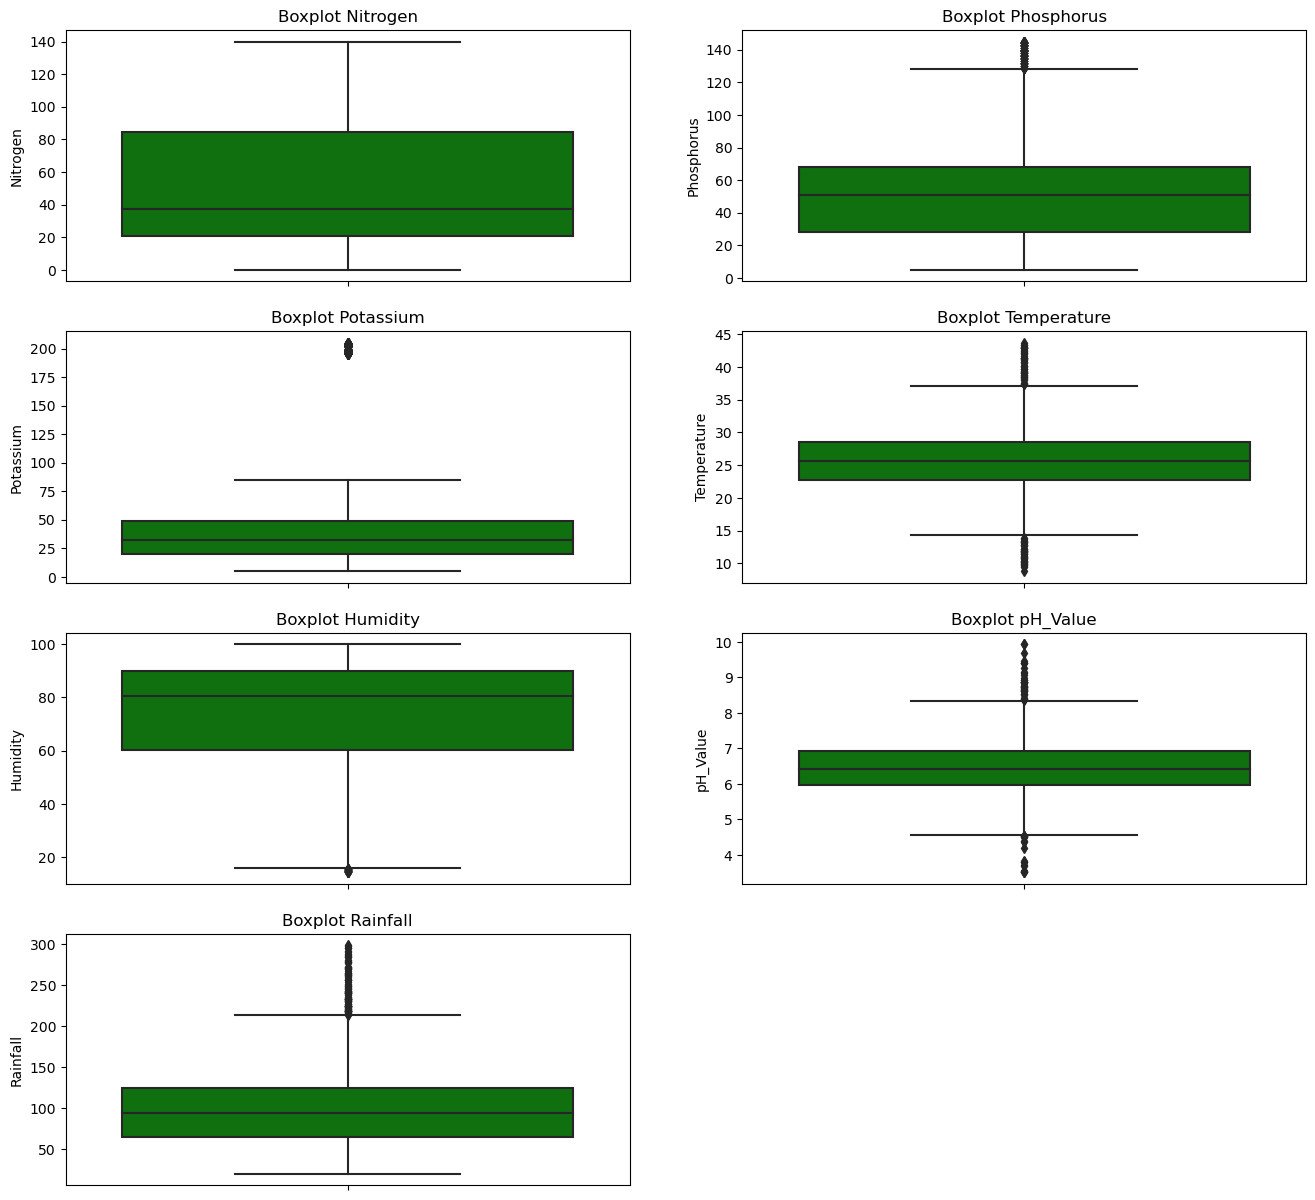

In [7]:
# Definindo o tamanho da figura e o número de subplots
plt.figure(figsize=(16, 15))

# Número de colunas e linhas para o grid de subplots
num_coluna = 2
num_linhas = (len(df.columns.drop('Crop')) + 1) // num_coluna

for i, col in enumerate(df.columns.drop('Crop'), 1):
    plt.subplot(num_linhas, num_coluna, i)
    sns.boxplot(y=df[col], color='green')
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)



A análise dos boxplots revela a presença de alguns outliers em nosso conjunto de dados. No entanto, é crucial considerar o contexto do nosso problema e examinar mais detalhadamente os dados coletados. Esses valores são consistentes com padrões observados em solos destinados à produção agrícola. Por exemplo, valores de pH abaixo de 4 ou acima de 10, embora raros, não são impossíveis e, portanto, não devem ser descartados automaticamente como outliers.

Para solucionar problemas relacionados a dados, é fundamental compreender o contexto em que esses dados foram coletados. Esse entendimento é essencial para a continuidade das nossas análises. Sem esse conhecimento contextual, uma pessoa pode interpretar erroneamente valores atípicos, como concentrações de potássio incomuns no solo, podendo descartá-los indevidamente ou presumir que houve algum erro na coleta dos dados.


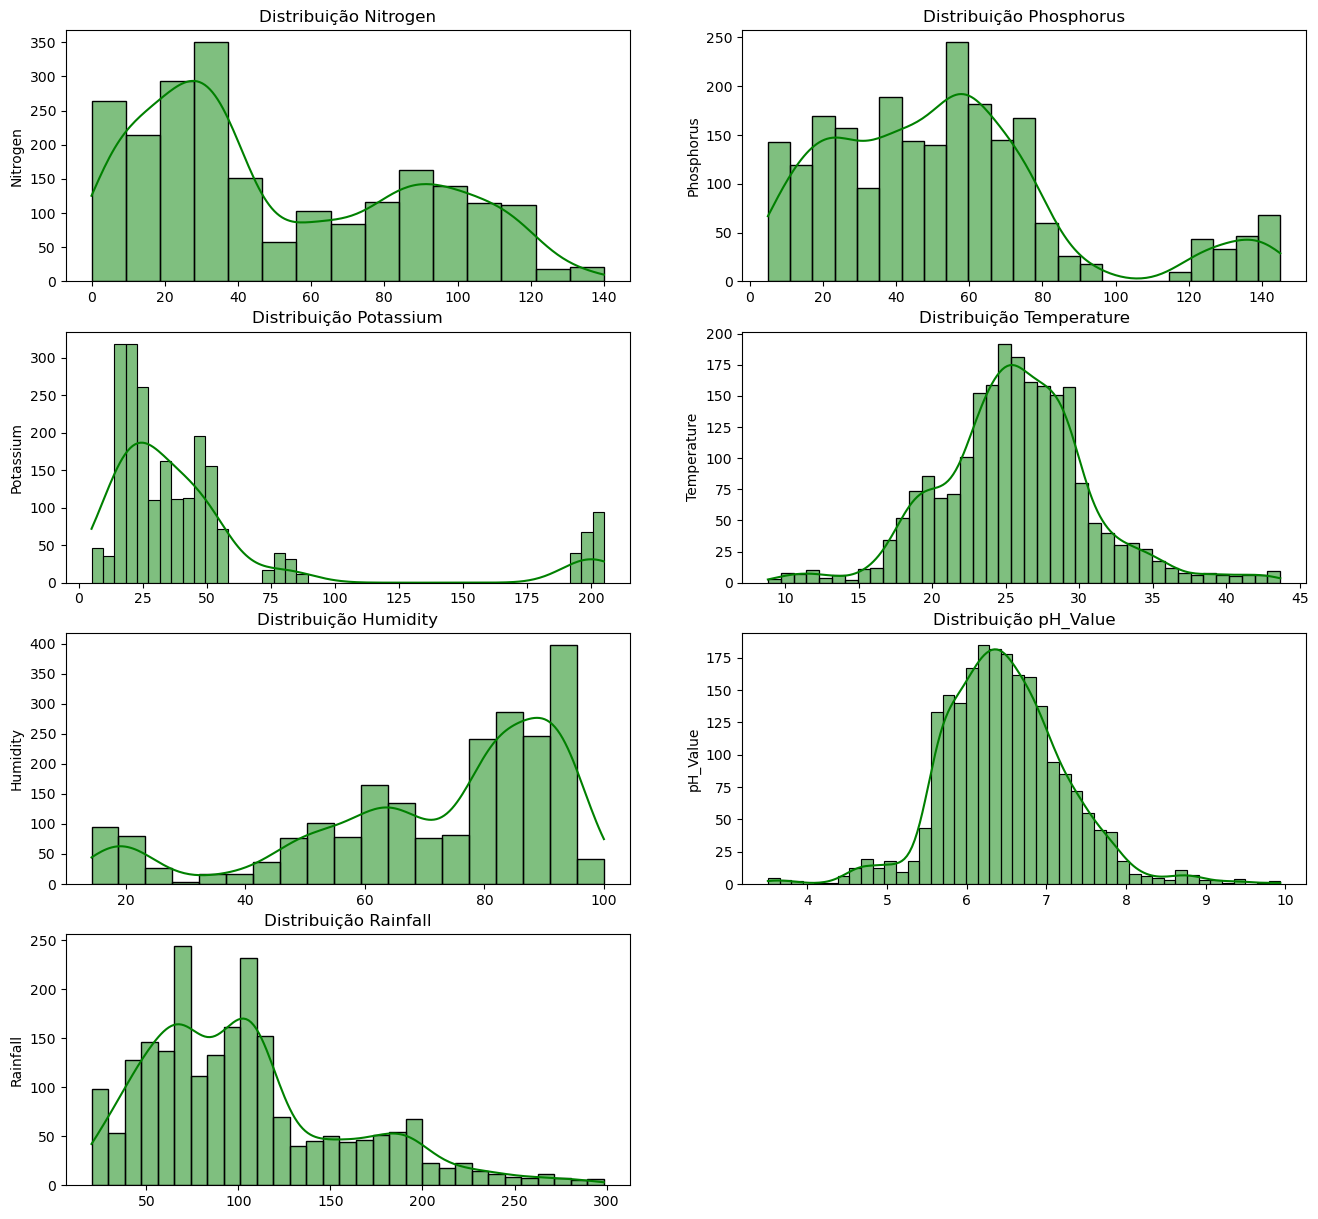

In [8]:
# Vamos observar a distribuição dos nossos dados e ver se estão normalizados
plt.figure(figsize=(16, 15))

# Número de colunas e linhas para o grid de subplots
num_coluna = 2
num_linhas = (len(df.columns.drop('Crop')) + 1) // num_coluna

for i, col in enumerate(df.columns.drop('Crop'), 1):
    plt.subplot(num_linhas, num_coluna, i)
    sns.histplot(x=df[col], color='green', kde=True)
    plt.title(f'Distribuição {col}')
    plt.ylabel(col)
    plt.xlabel("")

Analisando a distribuição dos nosso dados podemos observar algumas coisas:
* A distribuição normal na temperatura e no ph do solo já eram características esperadas para essea atributos. 
* Muitos atributos aparentam ter uma bimodalidade na distribuição, o que indica duas condições distintas para produção agrícola. Por exemplo, indicações de potássio entre 15~50 e uma contagem em ~200 indica que tem produtos que podem se beneficiar de valores extremos de concentração de potássio no solo. Isso pode ser observado também em umidade e fósforo.
* Vemos claramento a presença de outliers, são bastantes visuais. Mas novamento, isso não significa que são valores mal coletados, é necessário saber a realidade da produção agrícula e como nossos dados foram coletados.

**Vamos a média de nossas features para cada saída (plantação) possível.**

Com isso saberemos qual é o valor recomendado pelos nossos indicadores, ou pelo menos observado, para cada tipo de plantação disponível em nossa saída.

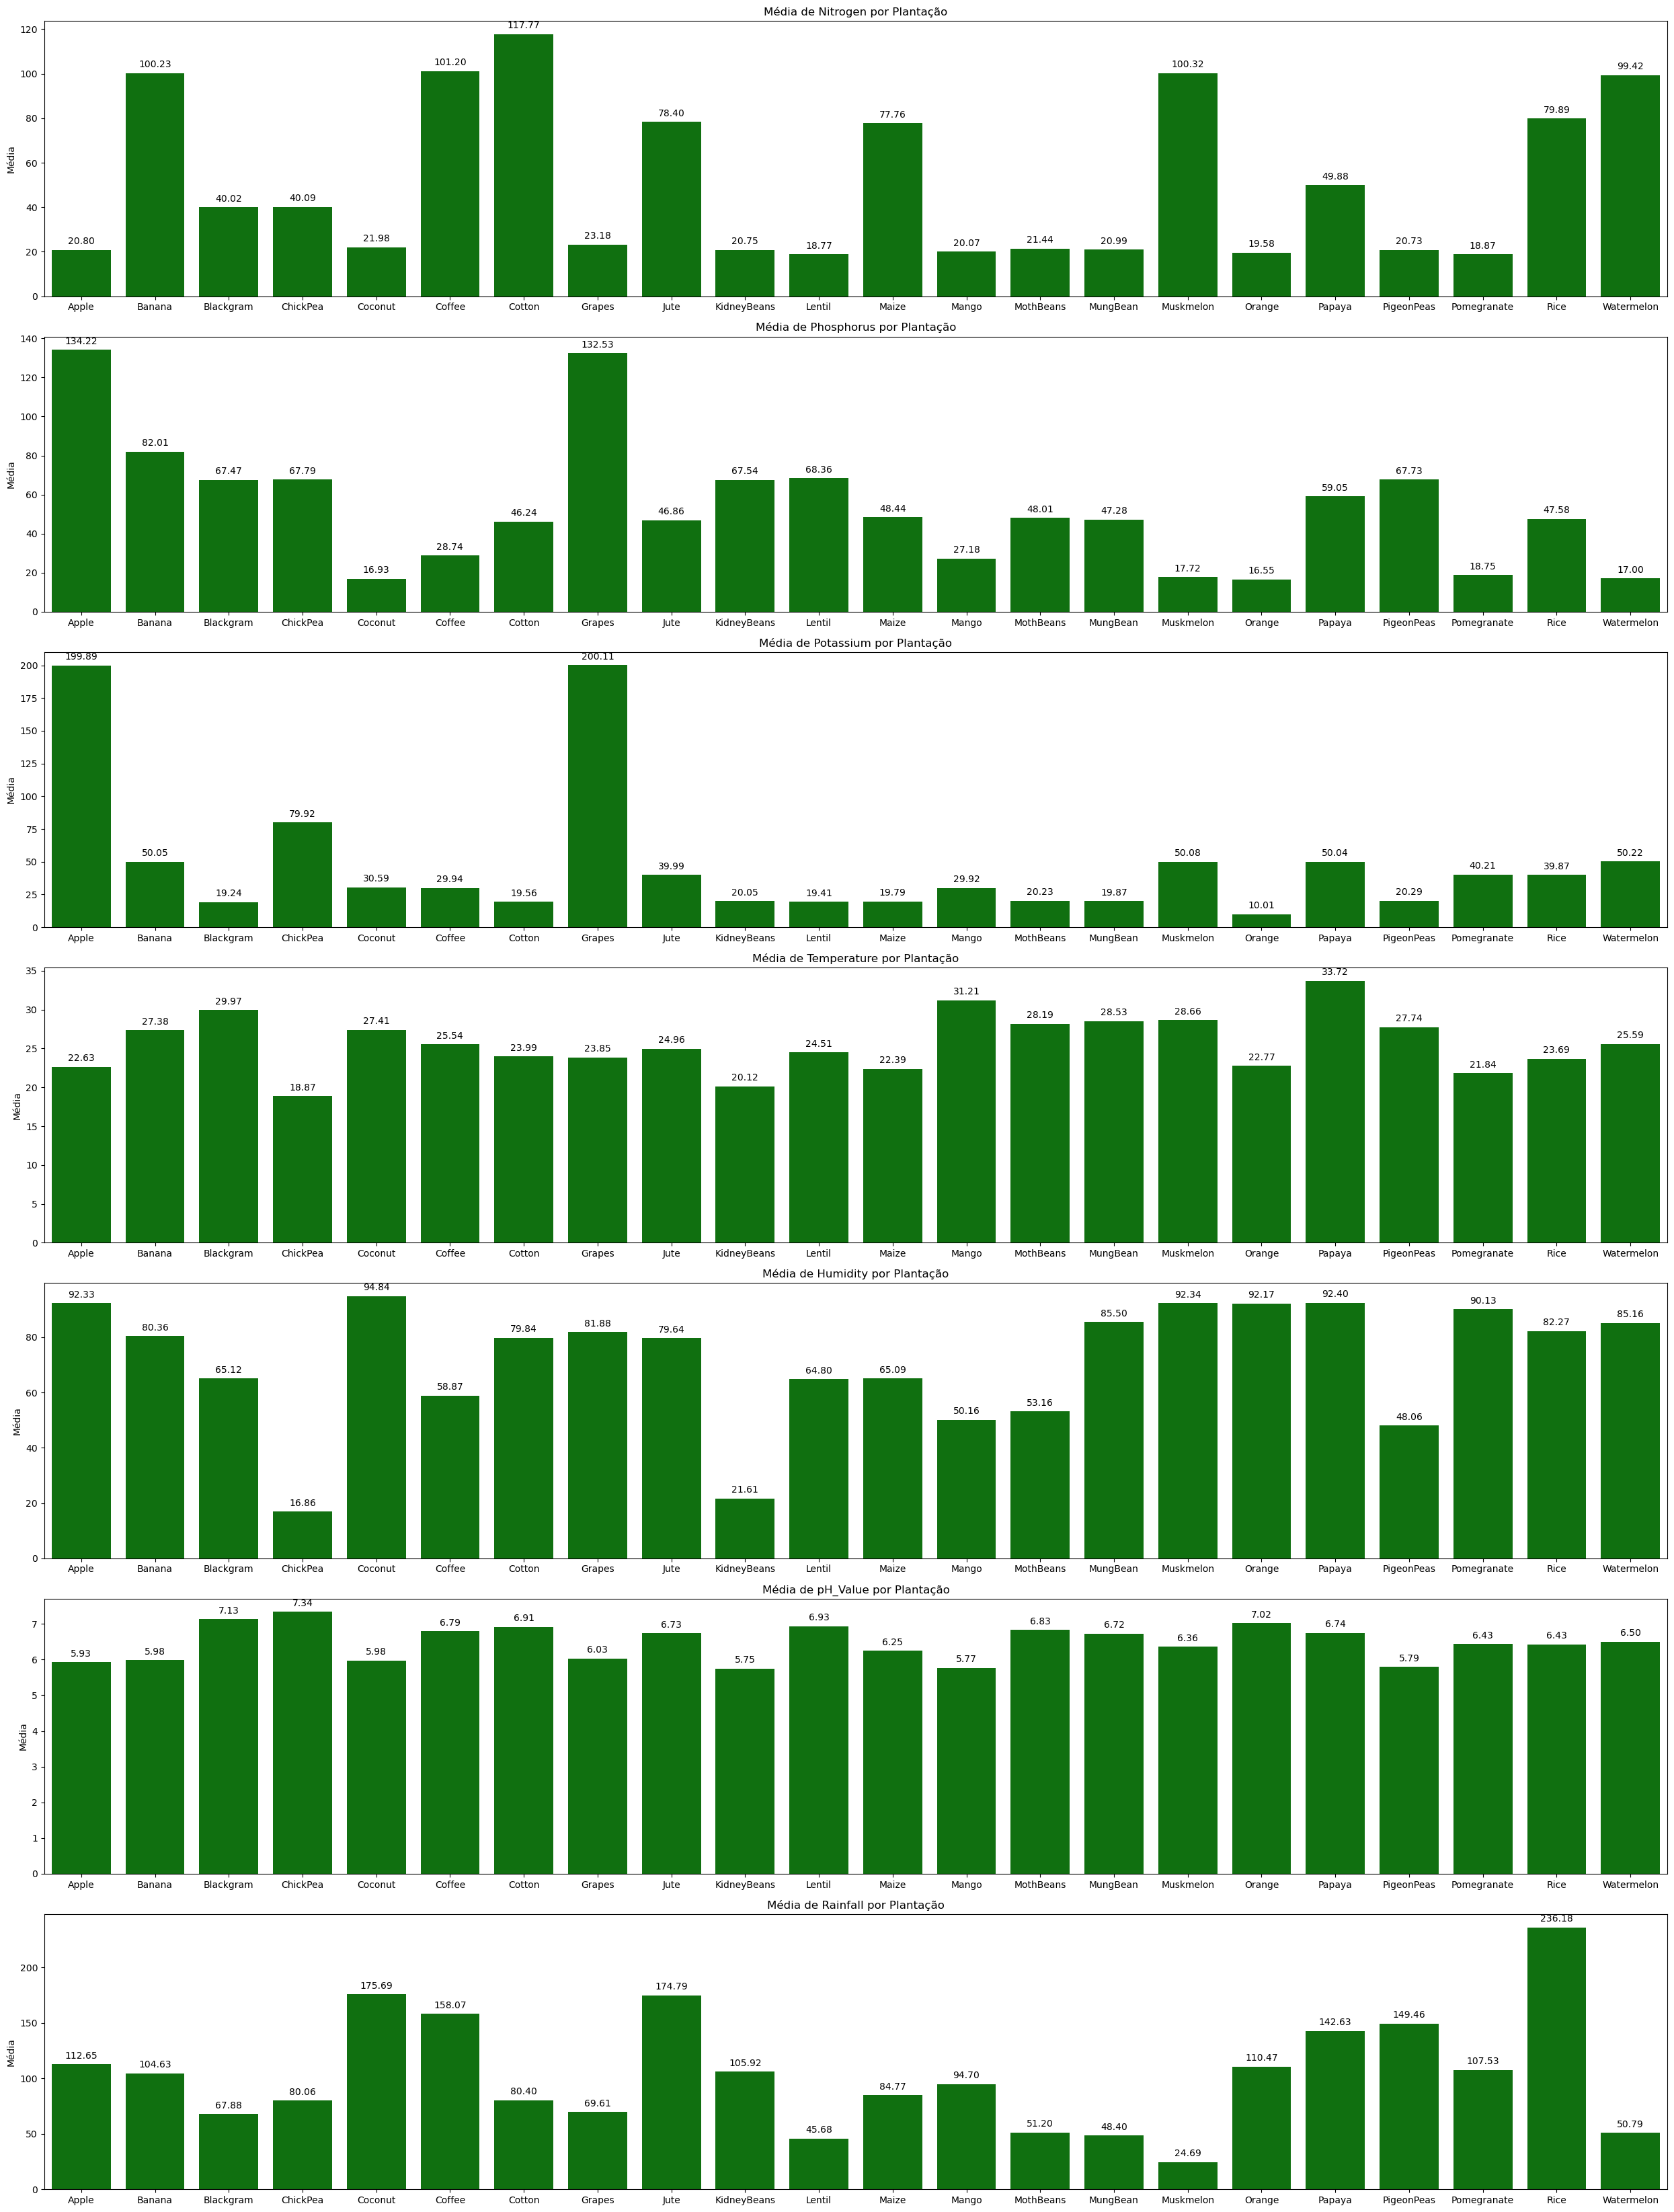

In [9]:
plt.figure(figsize=(25, 33))

for i, col in enumerate(df.columns.drop('Crop'), 1):
    plt.subplot(len(df.columns) - 1, 1, i)
    mean_values = df.groupby('Crop')[col].mean().reset_index()
    ax = sns.barplot(x='Crop', y=col, data=mean_values, color='green')
    plt.title(f'Média de {col} por Plantação')
    plt.ylabel('Média')
    plt.xlabel('')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', 
            xytext = (0, 9), 
            textcoords = 'offset points')

plt.tight_layout()

Podemos visualizar quais são os valores ideais para cada tipo de produção com base em nossos dados. Com esses valores, nosso modelo será capaz de recomendar a melhor cultura a ser plantada, dependendo dos valores coletados do solo.

Observamos que diferentes culturas podem ter características recomendadas semelhantes, apresentando valores indicados similares para alguns atributos do solo. No entanto, vamos desenvolver um modelo capaz de distinguir esses padrões similares e encontrar soluções específicas para cada caso.

Um produtor agrícola poderia analisar essas tabelas por dias para determinar o melhor curso de ação para sua produção. Contudo, com o modelo que iremos construir, nossa rede neural fornecerá essas respostas de forma automática, rápida e eficiente. Nosso modelo poderia obter muitas outras saídas e informações para aprimorar nosso modelo e aplicá-lo na prática em uma grande escala, mas, esta nossa abordagem atual já permitirá realizar testes e auxiliar pequenos empreendedores que não dispõem de todos os recursos necessários para escolher a melhor opção. 


### 04. Fazendo nosso modelo de Rede Neural

In [10]:
import tensorflow as tf

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Separando nossas features e nosso target
X = df.drop(columns=['Crop'], axis=1)
y = pd.Categorical(df['Crop']).codes # Vamos transformar o nosso target em int para funcionar na nossa rede neural

# Separando nosso dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

* *Vamos criar nosso primeiro modelo de rede neural sem a normalização dos dados, para depois observarmos a diferença de resultado com os dados normalizados.*

In [13]:
# Criando o modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(22, activation='softmax')
])

# Compilando o modelo
modelo.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# 'Fit' o modelo
history = modelo.fit(X_train,
           tf.one_hot(y_train, depth=22),
           epochs=50,
           validation_data=(X_test, tf.one_hot(y_test, depth=22)))


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1132 - loss: 8.1337 - val_accuracy: 0.3197 - val_loss: 2.3166
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3744 - loss: 2.1563 - val_accuracy: 0.4864 - val_loss: 1.6980
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5308 - loss: 1.5371 - val_accuracy: 0.7000 - val_loss: 1.0789
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7201 - loss: 1.0001 - val_accuracy: 0.7621 - val_loss: 0.7381
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8116 - loss: 0.6343 - val_accuracy: 0.8818 - val_loss: 0.4143
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8756 - loss: 0.4008 - val_accuracy: 0.9318 - val_loss: 0.2881
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9217 - loss: 0.2710 - val_accuracy: 0.9364 - val_loss: 0.2081
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9209 - loss: 0.2337 - val_accuracy: 0.9333 - val_loss:

<Axes: >

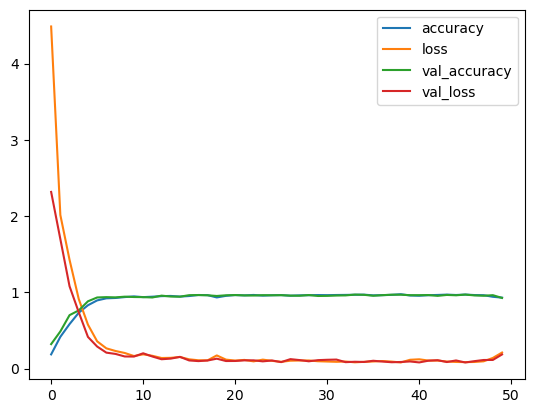

In [14]:
# Plotando nosso modelo
pd.DataFrame(history.history).plot()

* *Fazendo nosso modelo normalizado*

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Ajustando nosso modelo de treino para normalizar
X_train_norm = scaler.fit_transform(X_train)
# Normalizando também nosso teste
X_test_norm = scaler.fit_transform(X_test)

# Criando o modelo
modelo_norm = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(22, activation='softmax')
])

# Compilando o modelo
modelo_norm.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# 'Fit' o modelo
history_norm = modelo_norm.fit(X_train_norm,
           tf.one_hot(y_train, depth=22),
           epochs=50,
           validation_data=(X_test_norm, tf.one_hot(y_test, depth=22)))

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1050 - loss: 3.0486 - val_accuracy: 0.2167 - val_loss: 2.8384
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2012 - loss: 2.7332 - val_accuracy: 0.3470 - val_loss: 2.2515
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3854 - loss: 2.0901 - val_accuracy: 0.5258 - val_loss: 1.5746
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6022 - loss: 1.3912 - val_accuracy: 0.6909 - val_loss: 1.0750
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7071 - loss: 1.0030 - val_accuracy: 0.7636 - val_loss: 0.8293
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7736 - loss: 0.7724 - val_accuracy: 0.8182 - val_loss: 0.6506
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8329 - loss: 0.6118 - val_accuracy: 0.8409 - val_loss: 0.5324
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8484 - loss: 0.5211 - val_accuracy: 0.8848 - val_loss:

Nosso modelo normalizado apresentou melhor acurácia do que nosso modelo sem nenhuma transformação dos dados. Vamos prosseguir com nossos dados normalizados. Modelos de rede neural tendem a operar melhor com os dados tratados.

Text(0.5, 1.0, 'Curva de treinamento do modelo')

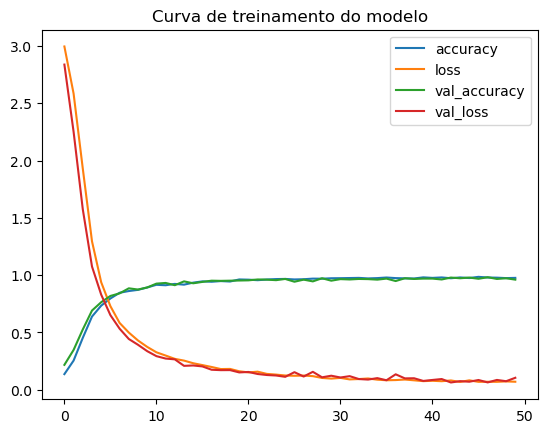

In [17]:
# Plotando nosso modelo
pd.DataFrame(history_norm.history).plot()
plt.title("Curva de treinamento do modelo")

### 05. Validação do nosso modelo

In [30]:
# Vamos verificar outras métricas de validação para observar a precisão do nosso modelo
from sklearn.metrics import classification_report
import numpy as np


# Fazendo as predições no conjunto de teste
y_pred_prob = modelo_norm.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convertendo os rótulos verdadeiros de one-hot encoding para rótulos de classe
y_true = np.argmax(tf.one_hot(y_test, depth=22), axis=1)

# Gerando o classification report
report = classification_report(y_true, y_pred)
print(report)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        36
           4       0.97      1.00      0.99        36
           5       0.97      0.85      0.90        33
           6       0.86      1.00      0.93        19
           7       1.00      1.00      1.00        28
           8       0.95      0.66      0.78        32
           9       1.00      1.00      1.00        41
          10       0.96      1.00      0.98        25
          11       0.84      0.90      0.87        29
          12       1.00      1.00      1.00        23
          13       1.00      0.97      0.98        29
          14       1.00      1.00      1.00        25
          15       1.00      0.89      0.94        36
          16       1.00      0.96      0

* *Matriz de confussão*

Com a matriz de confusão podemos observar onde nossos dados estão errando

In [42]:
# Vamos agora observar nossas saídas novamento como string para ver onde está a confussão do nosso dataset
class_names = df["Crop"].unique().tolist()
print(class_names)

['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas', 'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate', 'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple', 'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee']


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step


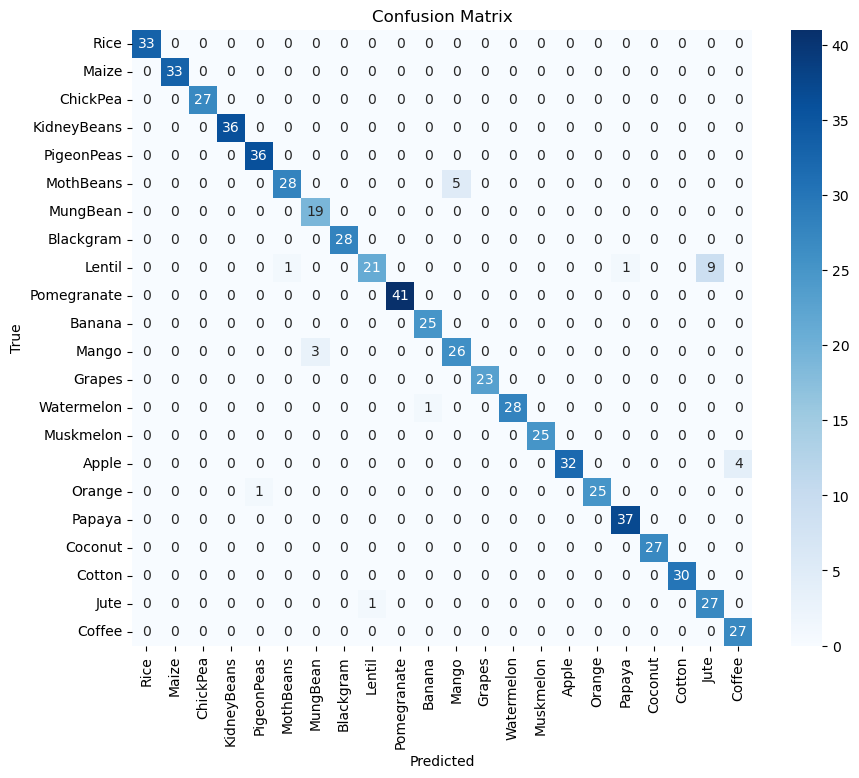

In [41]:
from sklearn.metrics import confusion_matrix

# Fazendo as predições no conjunto de teste
y_pred_prob = modelo_norm.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convertendo os índices para os nomes das classes originais
y_true_classes = [class_names[i] for i in y_test]
y_pred_classes = [class_names[i] for i in y_pred]

# Gerando a matriz de confusão
cm = confusion_matrix(y_true_classes, y_pred_classes, labels=class_names)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()